# Load the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# You can find the data under https://drive.google.com/drive/folders/1e550az93U3_kfRBbVY5PZnMKYwGYmHqi?usp=sharing

import pandas as pd
import numpy as np
from os.path import join

path = "/content/drive/My Drive/Colab Notebooks/cs412/Homeworks/hw1/"

train_data = pd.read_csv(join(path,"train_data.csv")) # One line of code
train_label = pd.read_csv(join(path,"train_label.csv")) # One line of code

test_data = pd.read_csv(join(path,"test_data.csv"))# One line of code
test_label = pd.read_csv(join(path,"test_label.csv")) # One line of code

In [4]:
# show random samples from the training data

train_data.head() # One line of code

,id,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,f_worker,checking_status_<0,checking_status_>=200,checking_status_no checking,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_domestic appliance,purpose_education,purpose_furniture/equipment,purpose_new car,purpose_other,purpose_radio/tv,purpose_repairs,purpose_retraining,purpose_used car,savings_status_500<=X<1000,savings_status_<100,savings_status_>=1000,savings_status_no known savings,employment_4<=X<7,employment_<1,employment_>=7,employment_unemployed,personal_status_male div/sep,personal_status_male mar/wid,personal_status_male single,other_parties_guarantor,other_parties_none,property_magnitude_life insurance,property_magnitude_no known property,property_magnitude_real estate,other_payment_plans_none,other_payment_plans_stores,housing_own,housing_rent,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_yes
0,1,6,1169,4,4,67,2,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1
1,2,48,5951,2,2,22,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0
2,3,12,2096,2,3,49,1,2,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0
3,4,42,7882,2,4,45,1,2,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0
4,5,24,4870,3,4,53,2,2,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0


# Train Decision Tree with default parameters

In [5]:
from sklearn.tree import DecisionTreeClassifier

# Train decision tree using the whole training data with **entropy** criteria

clf = DecisionTreeClassifier(criterion='entropy', random_state = 44) # One line of code
clf = clf.fit(train_data, train_label) # One line of code

# Estimate the prediction of test data
test_pred = clf.predict(test_data) # One line of code

# Calculate accuracy of test data
from sklearn.metrics import accuracy_score
TestAcc = accuracy_score(test_label, test_pred)# One line of code
print("Testing Accuracy = %.5f%%" % (TestAcc * 100))

Testing Accuracy = 68.11594%


# FineTune Decision Tree parameters

1- Spliting dataset into train and validation 

In [0]:
# Split training data to 70% training and 30% validation
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_data, train_label, test_size=0.3) # One line of code

2- FineTune minimum sample split

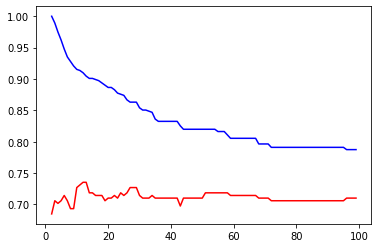

In [7]:
min_samples_splits = range(2, 100)

train_results = []
val_results = []
for min_samples_split in min_samples_splits:
  
  # Fit the tree using the 70% portion of the training data
  dt = DecisionTreeClassifier(criterion='entropy',min_samples_split=min_samples_split, random_state = 44)  # One line of code
  dt.fit(x_train, y_train)# One line of code
  
  # Evaluate on Training set
  train_pred = dt.predict(x_train)  # One line of code
  train_acc = accuracy_score(y_train, train_pred) # One line of code
  train_results.append(train_acc)
   
  # Evaluate on Validation set
  val_pred = dt.predict(x_val) # One line of code
  val_acc = accuracy_score(y_val, val_pred) # One line of code
  val_results.append(val_acc)
  
# Ploting
import matplotlib.pyplot as plt

plt.plot(min_samples_splits, train_results, 'b')
plt.plot(min_samples_splits, val_results,'r')
plt.show()

In [8]:
# Choose the best minimum split sample based on the plot
Best_minSampl = val_results.index(max(val_results)) + 2  # One line of code
# Train decision tree using the full training data and the best minimum split sample
clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=Best_minSampl) # One line of code
clf = clf.fit(train_data, train_label) # One line of code 

# Estimate the prediction of the test data
test_pred = clf.predict(test_data) # One line of code

# Calculate accuracy of test data
TestAcc = accuracy_score(test_label, test_pred) # One line of code
print("Testing Accuracy = %.5f%%" % (TestAcc * 100))

Testing Accuracy = 71.98068%


# Now, apply the same procedure but using KNN instead of decision tree 

# For finetuning, find the best value of K to use with this dataset.

In [9]:
# Write your code here

from sklearn.neighbors import KNeighborsClassifier

# initialize the values of k to be a list of odd numbers between 1 and 30
kVals = [i for i in range(1,30,2)]

# Save the accuracies of each value of kVal in [accuracies] variable
# hint: you can use accuracies.append(...) function inside the loop
accuracies = []

# loop over values of k for the k-Nearest Neighbor classifier
for k in kVals:
  # Follow what we did in decision tree part
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(x_train, y_train.values.reshape(-1))
  
  # Evaluate the model on validation set 
  score = model.score(x_val, y_val)
  print("For k = %d, validation accuracy = %.5f%%" % (k, score * 100))
  
  # Update the accuracies list
  accuracies.append(score)



# Train KNN using the full training data with the best K that you found
best_k = kVals[accuracies.index(max(accuracies))]
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(train_data, train_label.values.reshape(-1))

# Testing
predictions = model.predict(test_data)
TestAccuracy = accuracy_score(test_label, predictions)
print("Testing Accuracy = %.5f%%" % (TestAccuracy * 100))


For k = 1, validation accuracy = 59.66387%
For k = 3, validation accuracy = 60.92437%
For k = 5, validation accuracy = 65.12605%
For k = 7, validation accuracy = 66.80672%
For k = 9, validation accuracy = 67.64706%
For k = 11, validation accuracy = 68.90756%
For k = 13, validation accuracy = 70.16807%
For k = 15, validation accuracy = 71.00840%
For k = 17, validation accuracy = 70.58824%
For k = 19, validation accuracy = 71.42857%
For k = 21, validation accuracy = 70.58824%
For k = 23, validation accuracy = 72.26891%
For k = 25, validation accuracy = 72.26891%
For k = 27, validation accuracy = 73.52941%
For k = 29, validation accuracy = 73.10924%
Testing Accuracy = 70.53140%


# Bonus

# Apply gridsearch using decision tree on any hyperparameter(s) of your choice, you have to beat your previous obtained accuracies to get the bonus


In [10]:
# Write your code here
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 44)
params = {'max_depth':range(2,10),'min_samples_split':range(2,50)}

clf = GridSearchCV(model, params)
clf.fit(train_data,train_label)
est = clf.predict(test_data)
TestAccuracy = accuracy_score(test_label, est)
print('Best max_depth:', clf.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', clf.best_estimator_.get_params()['min_samples_split'])

print("Testing Accuracy = %.5f%%" % (TestAccuracy * 100))


Best max_depth: 8
Best min_samples_split: 43
Testing Accuracy = 75.36232%


In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

report = classification_report(test_label, est)
print(report)
c_matrix = confusion_matrix(test_label,est)
print(c_matrix)


              precision    recall  f1-score   support

           0       0.66      0.37      0.47        62
           1       0.77      0.92      0.84       145

    accuracy                           0.75       207
   macro avg       0.72      0.64      0.66       207
weighted avg       0.74      0.75      0.73       207

[[ 23  39]
 [ 12 133]]


# Report: Write a summary of your approach to this problem; this should be like an abstract of a paper or the executive summary (you aim for clarity and passing on information, not going to details about known facts such as what decision trees are, assuming they are known to people in your research area).

Must include statements such as:


*   Include the problem definition: 1-2 lines
*   Talk about train/val/test sets, size and how split.
*   State what your test results are with the chosen method, parameters: e.g. "We have obtained the best results with the ….. classifier (parameters=....) , giving classification accuracy of …% on test data…."
*   Comment on the speed of the algorithms and anything else that you deem important/interesting (e.g. confusion matrix)



# Write your report in this cell

We are trying to classify if bank should give credit or not based on data about people's credit history and personal information about belongings. 

I splitted my 70% of data for training and 30% for validation and trained with decision tree and KNN classifiers.

I have obtained the best results with the decision tree classifier *(parameters = {criterion: entropy, max_depth: 8, min_samples_split: 43})*, giving classification accuracy of **75.36232%** on test data.

After training, decision tree was faster than the KNN, because KNN algorithm checks every data point to classify while decision tree only searchs 8 depth.

Score about classification follows:
 
            precision    recall  f1-score   support
             0       0.66      0.37      0.47        62
             1       0.77      0.92      0.84       145

    accuracy                             0.75       207
    macro avg        0.72      0.64      0.66       207
    weighted avg     0.74      0.75      0.73       207

Confusion matrix follows:

    [ 23  39]
    [ 12 133]